In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from scipy.stats import norm

In [4]:
beml = pd.read_csv("BEML.csv")
beml

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.00,1151.00,1121.00,1134.00,1135.60,101651.0,1157.18
1,2010-01-05,1146.80,1149.00,1128.75,1135.00,1134.60,59504.0,676.47
2,2010-01-06,1140.00,1164.25,1130.05,1137.00,1139.60,128908.0,1482.84
3,2010-01-07,1142.00,1159.40,1119.20,1141.00,1144.15,117871.0,1352.98
4,2010-01-08,1156.00,1172.00,1140.00,1141.20,1144.05,170063.0,1971.42
...,...,...,...,...,...,...,...,...
1734,2016-12-26,965.00,965.05,935.00,950.10,950.25,398696.0,3783.63
1735,2016-12-27,960.70,989.00,952.35,974.00,975.70,808561.0,7885.14
1736,2016-12-28,980.75,985.00,970.15,977.00,974.40,367041.0,3592.49
1737,2016-12-29,977.10,997.95,974.55,985.15,986.05,555233.0,5489.14


In [5]:
glaxo = pd.read_csv("GLAXO.csv")
glaxo

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11
...,...,...,...,...,...,...,...,...
1734,2016-12-26,2703.00,2740.00,2677.00,2715.0,2723.50,3953.0,107.15
1735,2016-12-27,2722.95,2725.00,2683.00,2692.0,2701.75,10600.0,286.10
1736,2016-12-28,2701.75,2718.00,2690.00,2698.0,2702.15,6050.0,163.44
1737,2016-12-29,2702.05,2739.00,2691.95,2710.0,2727.90,7649.0,207.87


In [6]:
beml_df = beml[['Date','Close']]
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [7]:
glaxo_df = glaxo[['Date','Close']]
glaxo_df

,Date,Close
0,2010-01-04,1625.65
1,2010-01-05,1616.80
2,2010-01-06,1638.50
3,2010-01-07,1648.70
4,2010-01-08,1639.80
...,...,...
1734,2016-12-26,2723.50
1735,2016-12-27,2701.75
1736,2016-12-28,2702.15
1737,2016-12-29,2727.90


In [8]:
# Creating DatetimeIndex from column date to plot trends over time

beml_dti = beml_df.set_index(pd.DatetimeIndex(beml['Date']))
beml_dti

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05
...,...,...
2016-12-26,2016-12-26,950.25
2016-12-27,2016-12-27,975.70
2016-12-28,2016-12-28,974.40


In [9]:
glaxo_dti = glaxo_df.set_index(pd.DatetimeIndex(glaxo['Date']))
glaxo_dti

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80
...,...,...
2016-12-26,2016-12-26,2723.50
2016-12-27,2016-12-27,2701.75
2016-12-28,2016-12-28,2702.15


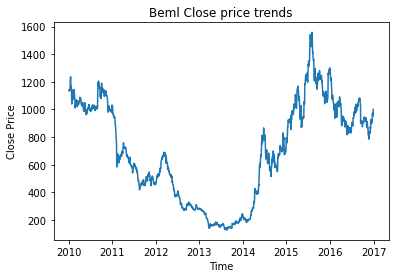

In [10]:
# Plotting Close price trends
plt.plot(beml_dti.Close)
plt.title('Beml Close price trends')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

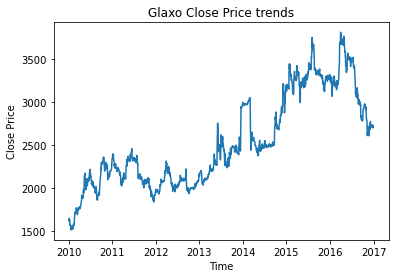

In [11]:
plt.plot(glaxo_dti.Close)
plt.title('Glaxo Close Price trends')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.show()

## 1. Expected daily Rate of return from these stocks ?

### Rate of return is Gain for positive values and Loss for negative values

In [12]:
beml_dti['Gain'] = beml_dti.Close.pct_change(periods=1)
beml_dti[['Gain']].dropna() # to remove NA values

,Gain
Date,
2010-01-05,-0.000881
2010-01-06,0.004407
2010-01-07,0.003993
2010-01-08,-0.000087
2010-01-11,-0.006162
...,...
2016-12-26,-0.021924
2016-12-27,0.026782
2016-12-28,-0.001332


In [13]:
glaxo_dti['Gain'] = glaxo_dti.Close.pct_change(periods=1)
glaxo_dti[['Gain']].dropna()

,Gain
Date,
2010-01-05,-0.005444
2010-01-06,0.013422
2010-01-07,0.006225
2010-01-08,-0.005398
2010-01-11,-0.006312
...,...
2016-12-26,-0.001283
2016-12-27,-0.007986
2016-12-28,0.000148


In [14]:
# Plotting Gains or Losses over time for both the stocks

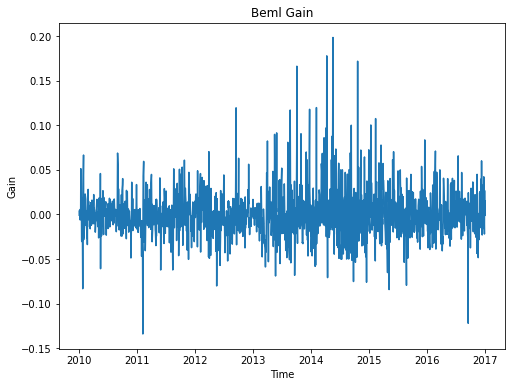

In [15]:
plt.figure(figsize=(8,6))
plt.plot(beml_dti.Gain)
plt.title('Beml Gain')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.show()

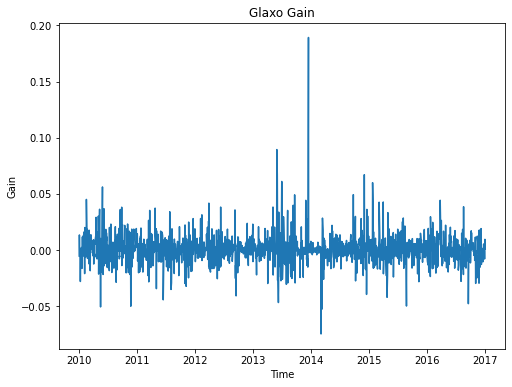

In [16]:
plt.figure(figsize=(8,6))
plt.plot(glaxo_dti.Gain)
plt.title('Glaxo Gain')
plt.xlabel('Time')
plt.ylabel('Gain')
plt.show()

In [17]:
# Plotting the normal distribution for both the stocks

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


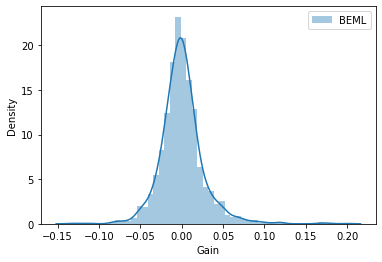

In [18]:
sns.distplot(beml_dti.Gain,label='BEML')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


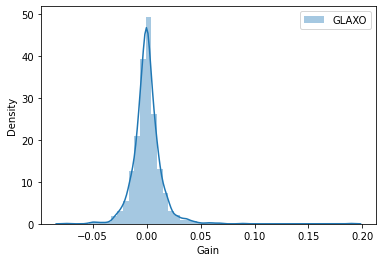

In [19]:
sns.distplot(glaxo_dti.Gain,label='GLAXO')
plt.xlabel('Gain')
plt.ylabel('Density')
plt.legend()

In [20]:
print('Beml mean:',round(beml_dti.Gain.mean(),4))
print('Beml SD:',round(beml_dti.Gain.std(),4))

Beml mean: 0.0003
Beml SD: 0.0264


In [21]:
print('Glaxo mean:',round(glaxo_dti.Gain.mean(),4))
print('Glaxo SD:',round(glaxo_dti.Gain.std(),4))


Glaxo mean: 0.0004
Glaxo SD: 0.0134


### Inference: Gain seems to be normally distributed for both the stocks with mean around 0.00. The expected daily rate of return (gain) is around 0% for both the stocks.


## 2. Which Stocks have higher risks or volatality as far as daily returns are concerned?

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


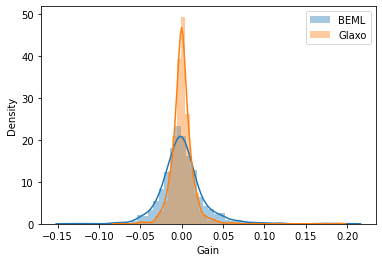

In [23]:
sns.distplot(beml_dti.Gain,label='BEML')
sns.distplot(glaxo_dti.Gain,label='Glaxo')
plt.legend()

### Inference: BEML seems to have a higher variance than Glaxo. Here, variance or standard deviation of gain indicates risk. So, BEML stock has a higher risk, as standard deviation of BEML = 2.64% compared to Standard deviation of Glaxo = 1.33%

## 3. Which Stock has higher probability of making a daily return of 2% or more ?

In [24]:
# P(X_beml>0.02)
1-stats.norm.cdf(0.02,0.0003,0.0264)

0.2277696435431158

In [25]:
# P(X_glaxo>0.02)
1-stats.norm.cdf(0.02,0.0004,0.0134)

0.07177658173190637

### Inference: BEML has higher probabilty of making a daily return of 2% or more with 22.77% probability as compared to Glaxo with 7.17% probability.

## 4. Which Stock has higher probability of making a loss (risk) of 2% or more ?

In [26]:
# P(X_beml>-0.02)
1-stats.norm.cdf(-0.02,0.0003,0.0264)

0.779035355037202

In [27]:
# P(X_glaxo>-0.02)
1-stats.norm.cdf(-0.02,0.0004,0.0134)

0.9360440625606244

### Inference: Glaxo has higher probability of making loss(risk) of 2% or more ith 93.6% probability as compared to Beml ith 77.9% probability


## 5. Compute 2% loss or gain for both the stocks

In [28]:
# P(-0.02 >= X_beml >= 0.02)
stats.norm.cdf(0.02,0.0003,0.0264)-stats.norm.cdf(-0.02,0.0003,0.0264)

0.5512657114940862

In [29]:
# P(-0.02 >= X_glaxo >= 0.02)
stats.norm.cdf(0.02,0.0004,0.0134)-stats.norm.cdf(-0.02,0.0004,0.0134)

0.8642674808287181

### Inference: Glaxo is at higher risk of making 2% loss or gain by 86.42% probability than Beml 55.12% probability.